In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyodbc
import scipy.stats as stats

In [4]:
server = 'NITRO\\SQLEXPRESS'
database = 'cars_data'
driver = 'ODBC Driver 17 for SQL Server'

In [5]:
connection_string = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
conn = pyodbc.connect(connection_string)
cursor = conn.cursor()

In [6]:
def get_table(connection):
    cursor = connection.cursor()
    cursor.execute("SELECT Final_data FROM information_schema.tables")
    tables = cursor.fetchall()
    cursor.close()
    return [table[0] for table in tables]

In [7]:
dfz ={}

In [8]:
query = f"SELECT * FROM Final_data"
try:
    df = pd.read_sql(query, conn)
    dfz[query] = df
    print(f"Data from Final_data retrieved successfully")

except Exception as e:
    print(f"Error retrieving data from Final_data: {e}")

Data from Final_data retrieved successfully


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10256\1438370373.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [9]:
cursor.close()
conn.close()


In [10]:
df.describe()

,Price,Public_Year,Mileage,Year
count,4337.000000,4337.000000,4337.000000,4337.000000
mean,0.044084,2018.441088,0.006132,5.558912
std,0.063309,4.159948,0.026559,4.159948
min,0.000000,1995.000000,0.000000,0.000000
25%,0.016531,2016.000000,0.002300,2.000000
50%,0.024129,2020.000000,0.004800,4.000000
75%,0.044700,2022.000000,0.007700,8.000000
max,1.000000,2024.000000,1.000000,29.000000


In [11]:
filtered_cars = df[df['Public_Year'] == 1995]

car_names = filtered_cars['Name']
print(car_names)

1199    Jeep Wrangler
Name: Name, dtype: object


In [12]:
filtered_cars = df[df['Public_Year'] == 1995]

car_names = filtered_cars['Price']
print(car_names)

1199    0.021497
Name: Price, dtype: float64


## removing outlier

In [13]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

print("Rows removed as outliers:")
print(outliers)


Rows removed as outliers:
                                Name     Price    Sale_Date  Public_Year  \
57           Audi Q7 55 TFSI Quattro  0.091586  19/10/2024          2020   
58           Audi Q7 55 TFSI Quattro  0.091586  19/10/2024          2020   
59           Audi Q7 55 TFSI Quattro  0.091586  19/10/2024          2020   
61    Audi Q8 55 TFSI S-Line Quattro  0.117161  19/10/2024          2020   
62    Audi Q8 55 TFSI S-Line Quattro  0.127168  19/10/2024          2021   
...                              ...       ...          ...          ...   
3860            Toyota Prado VX 2.7L  0.087880  19/10/2024          2021   
3862            Toyota Prado VX 2.7L  0.098592  19/10/2024          2021   
3863            Toyota Prado VX 2.7L  0.087880  20/10/2024          2021   
3864            Toyota Prado VX 2.7L  0.087880  20/10/2024          2021   
4335      Volvo XC90 Ultimate B6 AWD  0.140104  20/10/2024          2023   

      Mileage     Origin Body_Type        City  Year Fuel_Typ

In [14]:
df_cleaned = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4337 non-null   object 
 1   Price         4337 non-null   float64
 2   Sale_Date     4337 non-null   object 
 3   Public_Year   4337 non-null   int64  
 4   Mileage       4337 non-null   float64
 5   Origin        4337 non-null   object 
 6   Body_Type     4337 non-null   object 
 7   City          4337 non-null   object 
 8   Year          4337 non-null   int64  
 9   Fuel_Type     4337 non-null   object 
 10  Manufacturer  4337 non-null   object 
 11  Price_binned  4337 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 406.7+ KB


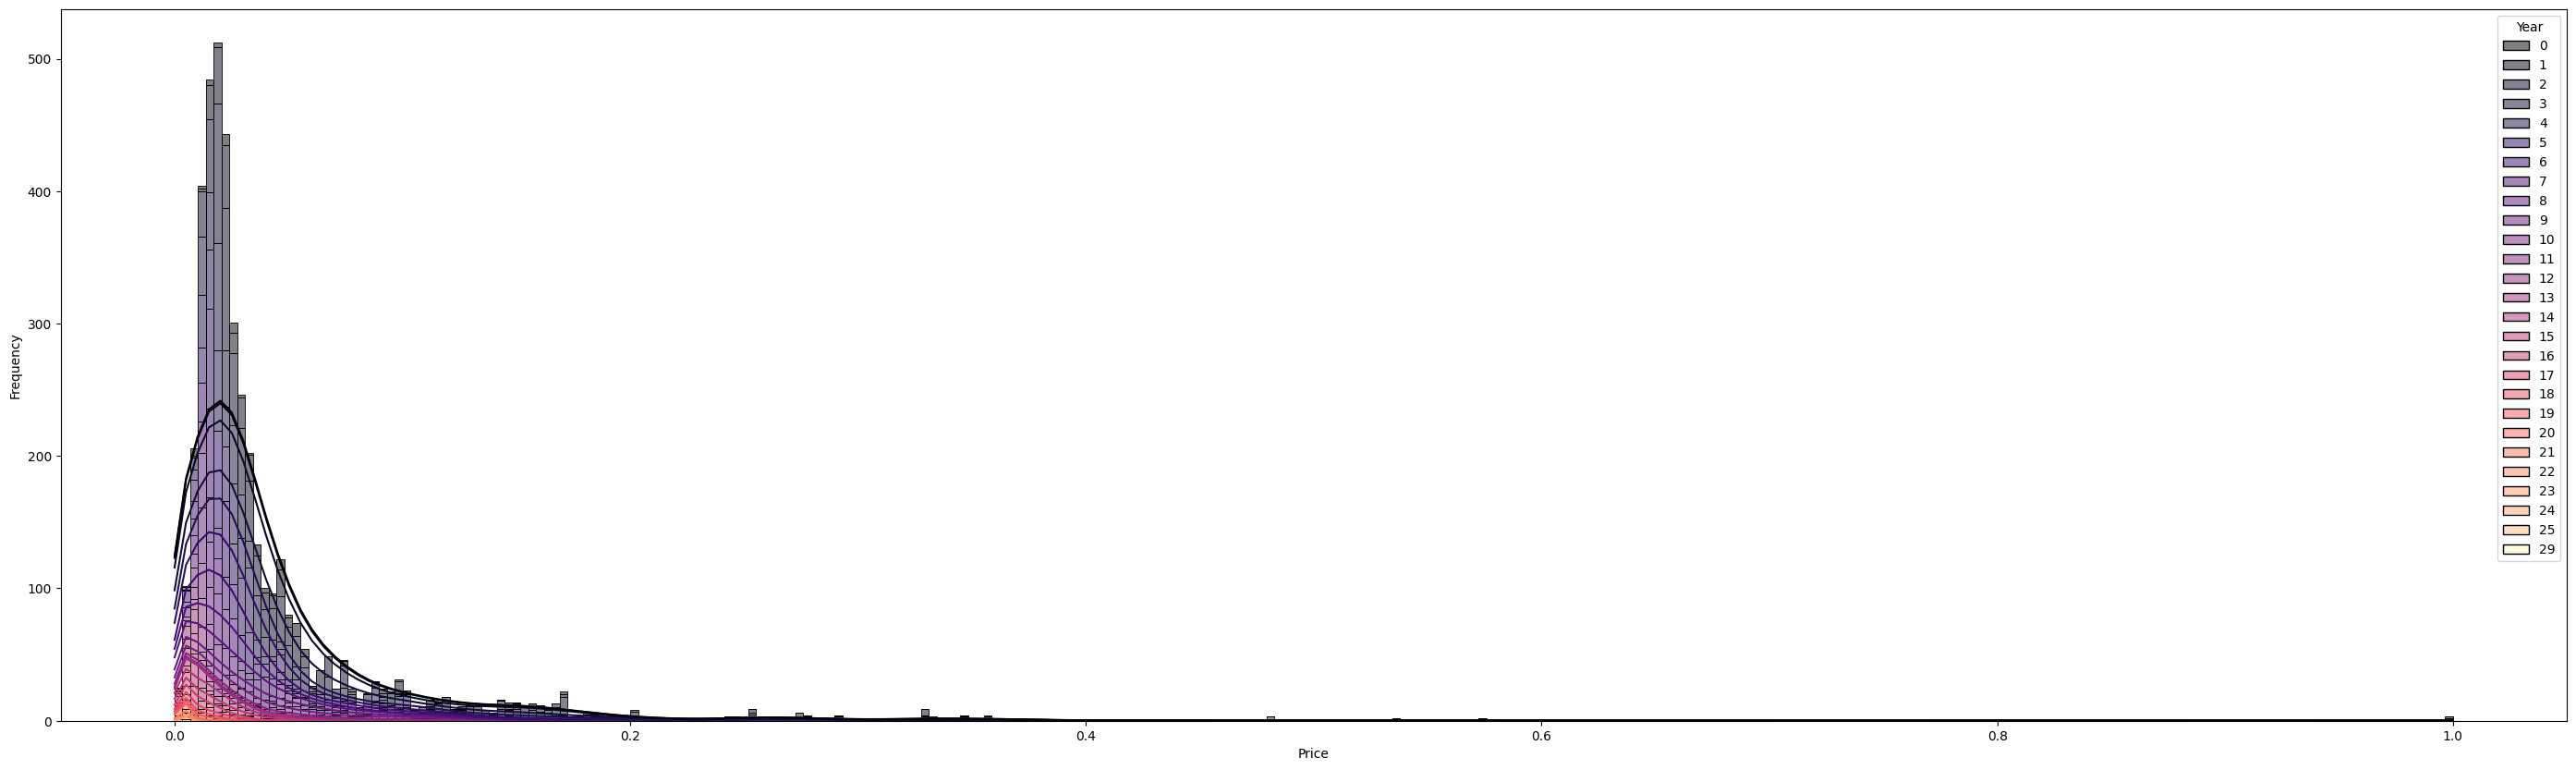

In [16]:
plt.figure(figsize=(35,10))
sns.histplot(data=df, x="Price", hue="Year", multiple="stack", kde=True, palette="magma")

plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

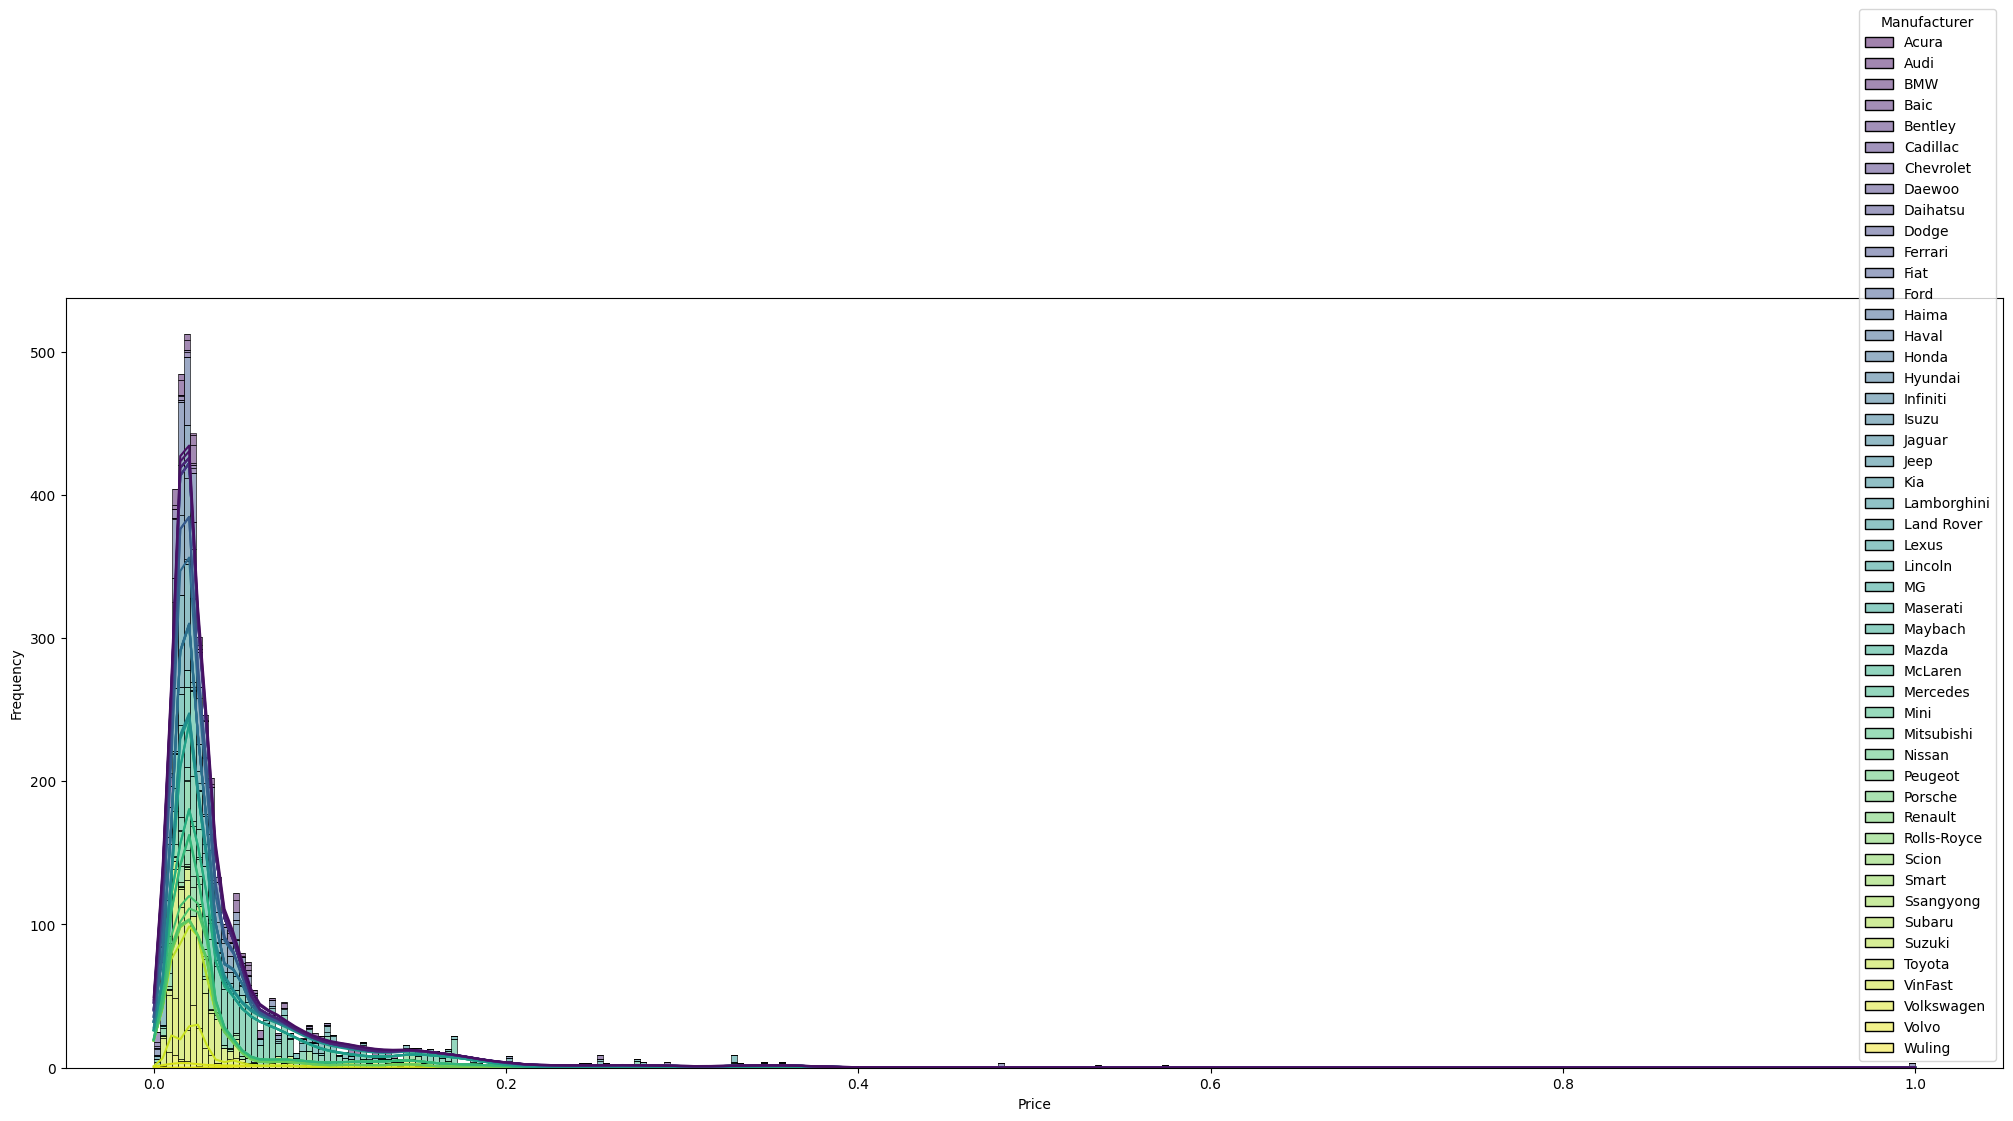

In [17]:
plt.figure(figsize=(25, 10))
sns.histplot(data=df, x="Price", hue="Manufacturer", multiple="stack", kde=True, palette="viridis")

plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

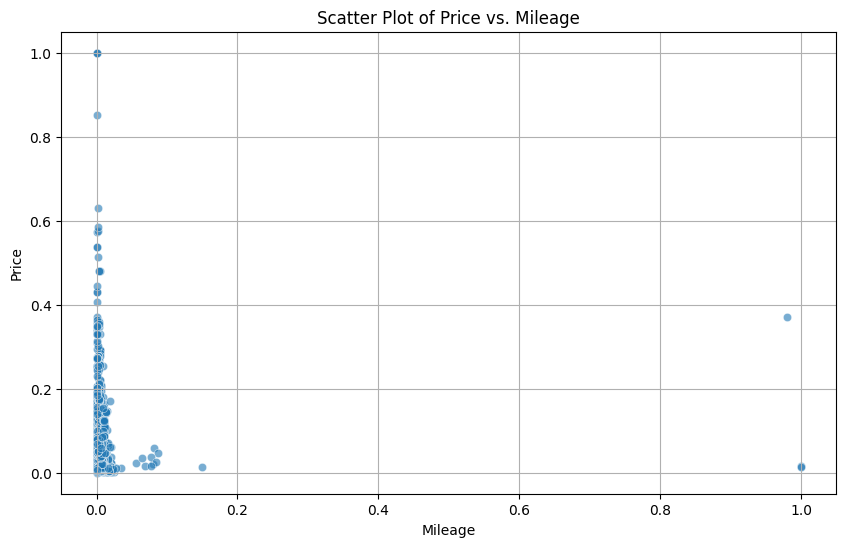

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df, alpha=0.6)

plt.title('Scatter Plot of Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)

plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4337 non-null   object 
 1   Price         4337 non-null   float64
 2   Sale_Date     4337 non-null   object 
 3   Public_Year   4337 non-null   int64  
 4   Mileage       4337 non-null   float64
 5   Origin        4337 non-null   object 
 6   Body_Type     4337 non-null   object 
 7   City          4337 non-null   object 
 8   Year          4337 non-null   int64  
 9   Fuel_Type     4337 non-null   object 
 10  Manufacturer  4337 non-null   object 
 11  Price_binned  4337 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 406.7+ KB


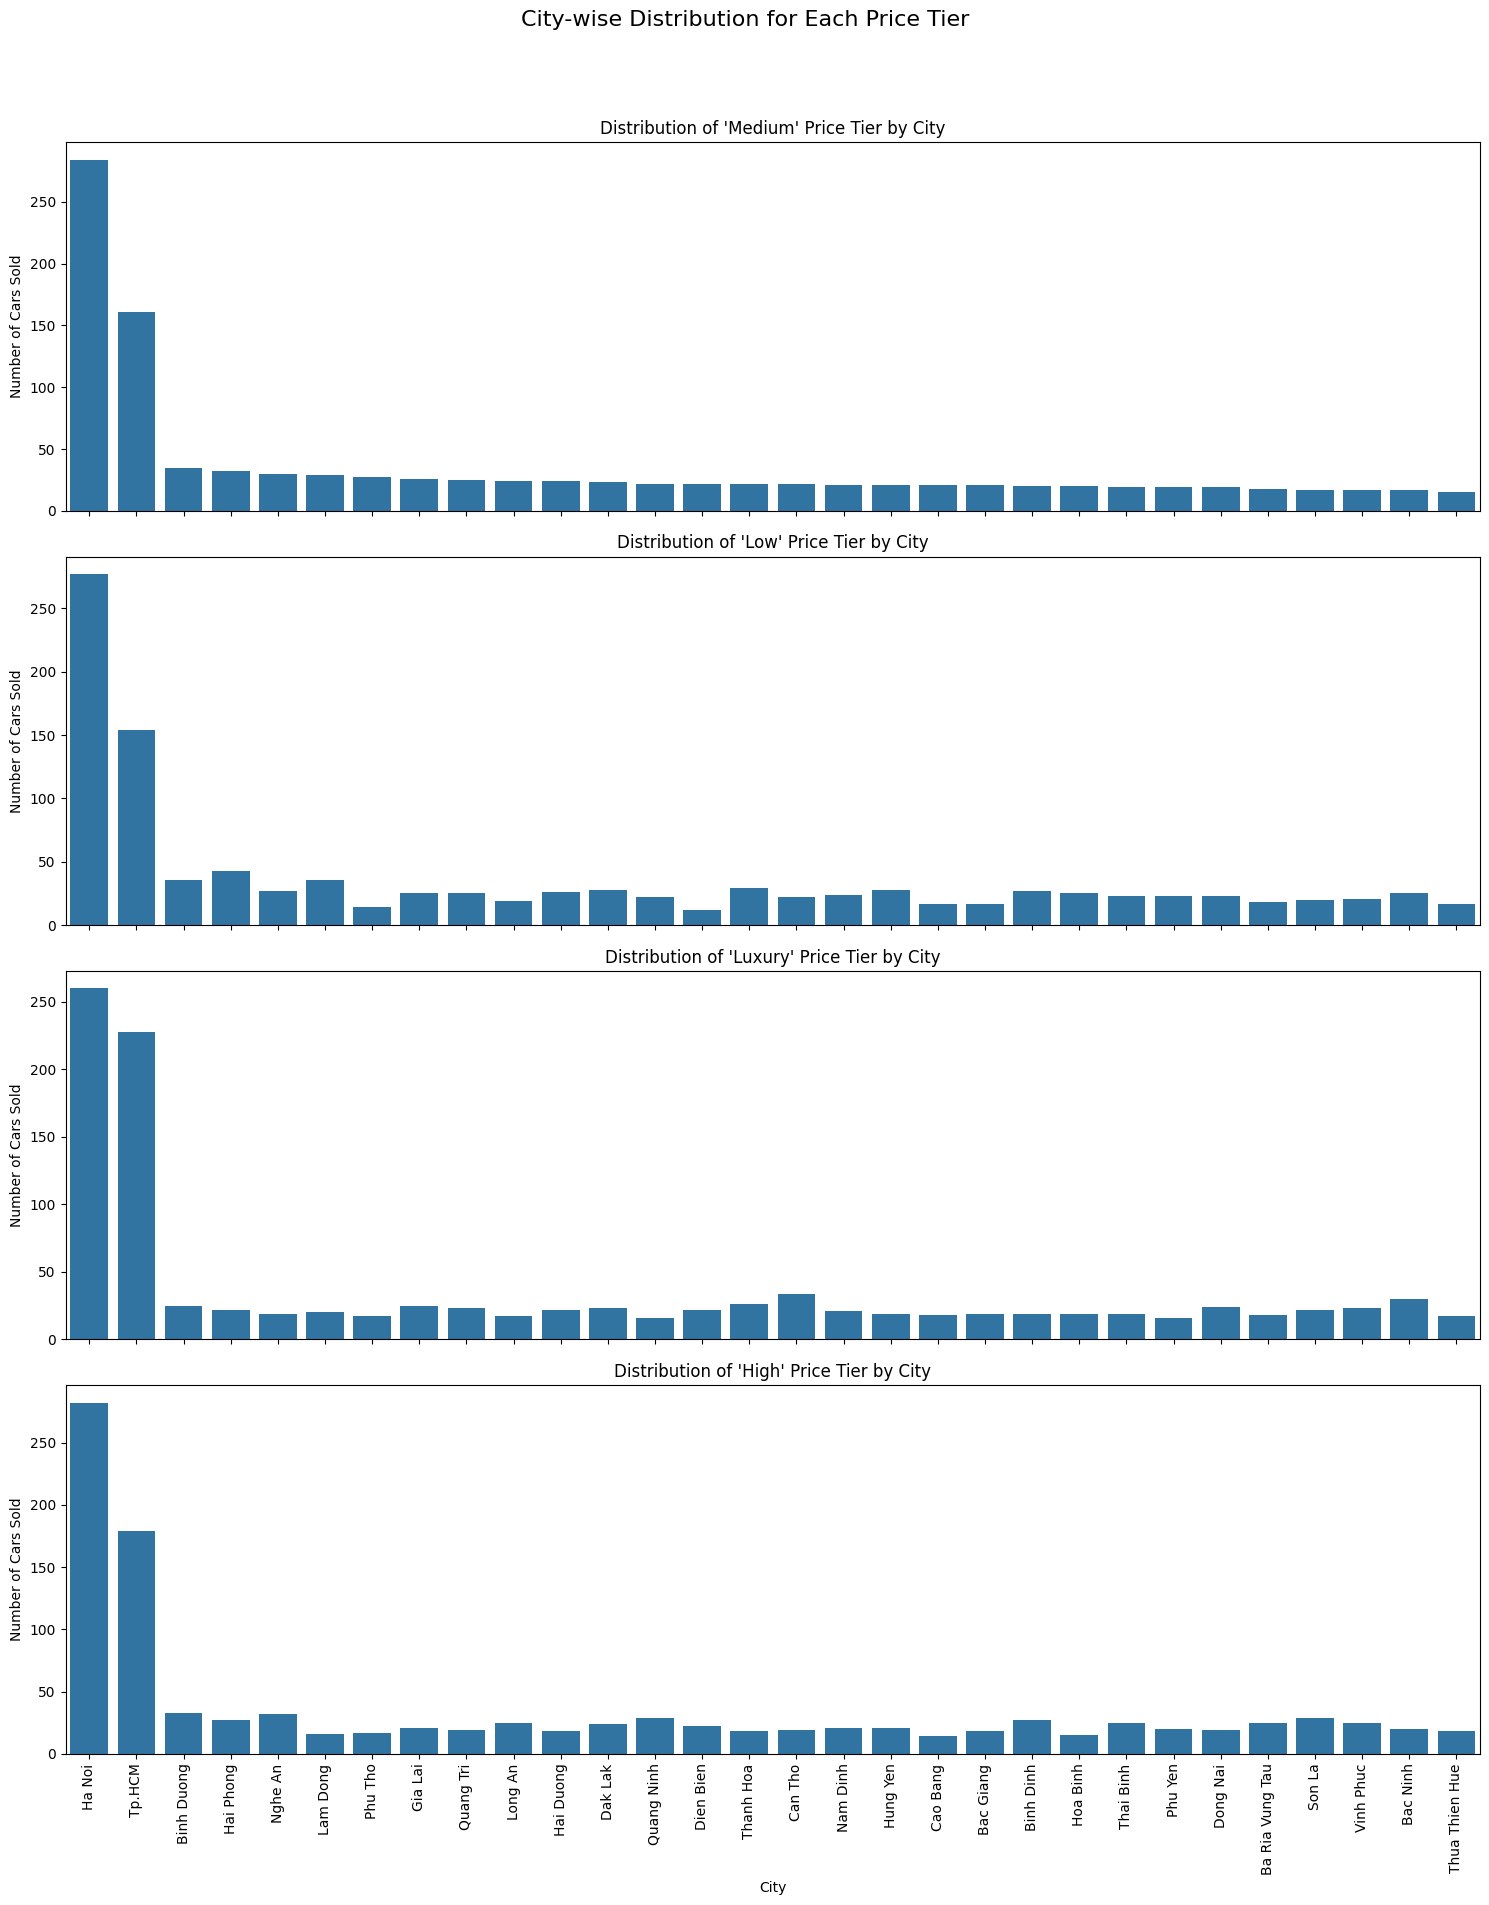

In [20]:
price_tiers = df['Price_binned'].unique()

fig, axes = plt.subplots(nrows=len(price_tiers), figsize=(15, 20), sharex=True)
fig.suptitle("City-wise Distribution for Each Price Tier", fontsize=16)

for i, tier in enumerate(price_tiers):
    df_tier = df[df['Price_binned'] == tier]
    
    sns.countplot(data=df_tier, x='City', ax=axes[i], order=df_tier['City'].value_counts().index)
    axes[i].set_title(f"Distribution of '{tier}' Price Tier by City")
    axes[i].set_ylabel("Number of Cars Sold")
    axes[i].tick_params(axis='x', rotation=90)

axes[-1].set_xlabel("City")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## cal mean for each year

In [21]:
yearly_price = df.groupby('Public_Year')['Price'].mean()

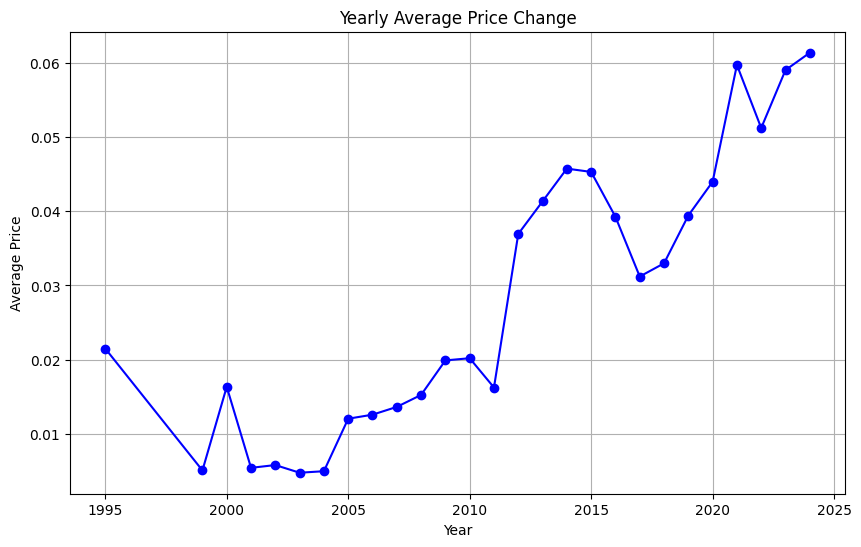

In [22]:

plt.figure(figsize=(10, 6))
plt.plot(yearly_price.index, yearly_price.values, marker='o', linestyle='-', color='b')

plt.title('Yearly Average Price Change')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)

plt.show()

In [23]:
df.describe()

,Price,Public_Year,Mileage,Year
count,4337.000000,4337.000000,4337.000000,4337.000000
mean,0.044084,2018.441088,0.006132,5.558912
std,0.063309,4.159948,0.026559,4.159948
min,0.000000,1995.000000,0.000000,0.000000
25%,0.016531,2016.000000,0.002300,2.000000
50%,0.024129,2020.000000,0.004800,4.000000
75%,0.044700,2022.000000,0.007700,8.000000
max,1.000000,2024.000000,1.000000,29.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4337 non-null   object 
 1   Price         4337 non-null   float64
 2   Sale_Date     4337 non-null   object 
 3   Public_Year   4337 non-null   int64  
 4   Mileage       4337 non-null   float64
 5   Origin        4337 non-null   object 
 6   Body_Type     4337 non-null   object 
 7   City          4337 non-null   object 
 8   Year          4337 non-null   int64  
 9   Fuel_Type     4337 non-null   object 
 10  Manufacturer  4337 non-null   object 
 11  Price_binned  4337 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 406.7+ KB


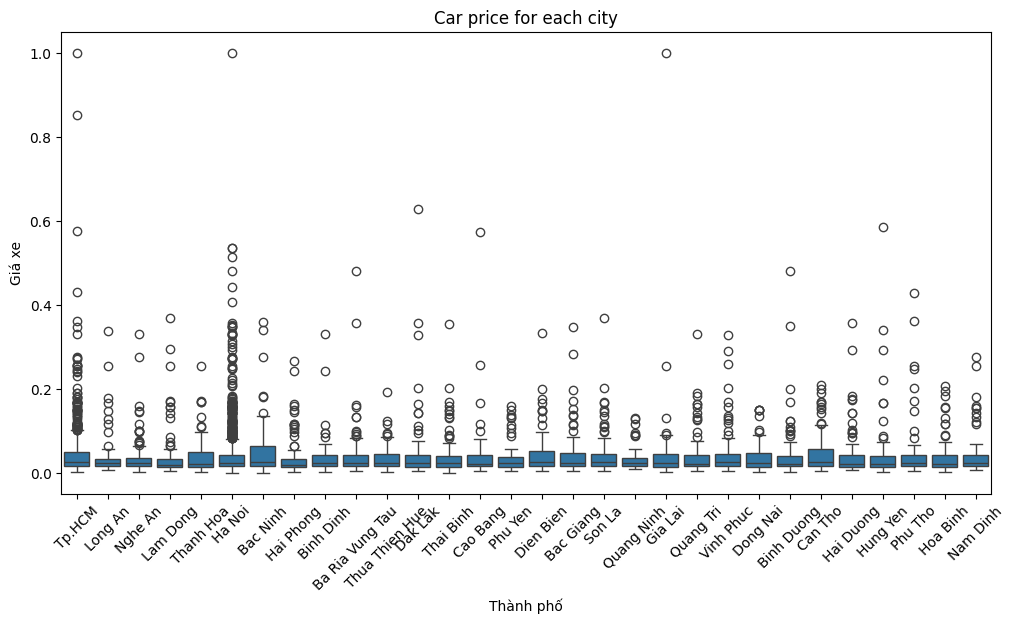

In [25]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='City', y='Price', data=df)
plt.title('Car price for each city')
plt.xlabel('Thành phố')
plt.ylabel('Giá xe')
plt.xticks(rotation=45)

plt.show()


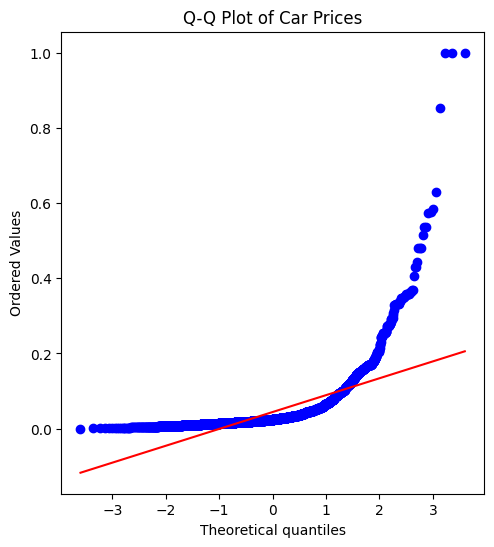

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Car Prices")
plt.show()

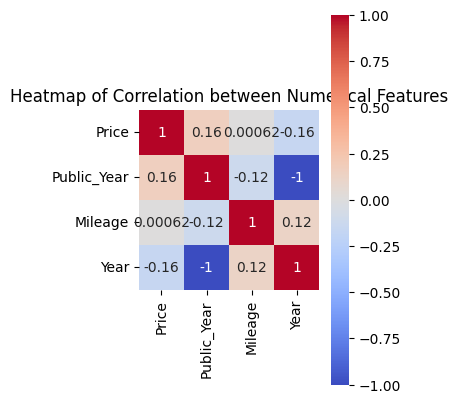

In [31]:
plt.subplot(1, 2, 2)
corr_matrix = df[['Price', 'Public_Year', 'Mileage', 'Year']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Heatmap of Correlation between Numerical Features")

plt.show()